# Facial Emotions Recognition

### Domain Background

Facial emotions are important factors in human communication that help us understand the intentions of others. In general, people infer the emotional states of other people, such as joy, sadness, and anger, using facial expressions and vocal tone. According to different surveys, verbal components convey one-third of human communication, and nonverbal components convey two-thirds. Among several nonverbal components, by carrying emotional meaning, facial expressions are one of the main information channels in interpersonal communication. Interest in automatic facial emotion recognition (FER) has also been increasing recently with the rapid development of artificial intelligent techniques, including in human-computer interaction (HCI), virtual reality (VR), augment reality (AR), advanced driver assistant systems (ADASs), and entertainment. Although various sensors such as an electromyograph (EMG), electrocardiogram (ECG), electroencephalograph (EEG), and camera can be used for FER inputs, a camera is the most promising type of sensor because it provides the most informative clues for FER and does not need to be worn.

My journey to decide on this project was exciting. My motive was to prove the utility of Deep neural nets in the contemporary research. Facial emotional recoginition/ pattern recognintion had been in research since long. The following acaemic papers were very helpful in  

1. [Giving a historic overview of research in Facial Emotional Recognition](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5856145/)
2. [Deciding on a posed dataset with seven different emotions](http://www.consortium.ri.cmu.edu/data/ck/CK+/CVPR2010_CK.pdf)
3. [Developing a baseline algorithm](https://pdfs.semanticscholar.org/9bf2/c915943cb74add761ec4636f323337022a97.pdf)
4. [Improving the Facial Emotions Recognition using Deep Convolutional Neuralnets](https://arxiv.org/pdf/1509.05371v2.pdf)

### Problem Statement


 The objective of this project is to showcase two different solutions in solving the problem of Facial emotional recognition from a posed dataset. Both the solutions are based on the problem space of supervised learning. But the first solution I propose is more involved and has more human interference than the second solution which uses state of art artificial neuralnets. The goal is to compare the two approaches using a performance metric - i.e how well the supervised learning model detects the expression posed in a still image. The posed dataset has labels associated with it. The labels define the most probable emotion. After running our two supervised learning model, we use accuracy score as the performance metric to decide how well the model has performed.
 
accuracy score = A ratio of # of correctly predicted emotions in images / total number of images.

### Datasets and Inputs

I use [Cohn-Kanade dataset](http://www.consortium.ri.cmu.edu/ckagree/). This dataset has been introduced by [Lucey et al](http://www.pitt.edu/~jeffcohn/CVPR2010_CK+2.pdf). 210 persons, aged 18 to 50, have been recorded depicting emotions.Out of 210 people, only 123 subjects gave posed facial expression. This dataset contains the recordings of their emotions. Both female and male persons are present from different background. 81 % Euro-Americans and 13%  are Afro-Americans. The images are of size 640 * 490 pixels as well as 640 * 480 pixels.  They are both grayscale and colored. in total there are 593 emotion-labeled sequences. There are seven different emotions that are depicted. They are:

0. 0=Neutral
1. 1=Anger
2. 2=Contempt
3. 3=Disgust
4. 4=Fear
5. 5=Happy
6. 6=Sadness
7. 7=Surprise

The images within each subfolder may have an image sequence of the subject. The first image in the sequence starts with a neutral face and the final image in the sub folder has the actual emotion. So from each subfolder ( image sequence), I have to extract two images,  the neutral face and final image with an emotion. ONLY 327 of the 593 sequences have emotion sequences. This is because these are the only ones the fit the prototypic definition. Also all these files are only one single emotion file. I have to preprocess this dataset to make it as an uniform input. I will make sure the images are all of same size and atmost it has one face depicting the emotion for now. After detecting the face in the image, I will convert the image to grayscale image, crop it and save it. I will use OpenCV to automate face finding process. OpenCv comes up with 4 different pre-trained  classifiers. I will use all of them to find the face in the image and abort the process when the face is identified. These identified, cropped, resize image becomes input feature. The emotion labels are the output.



### Solution Statement

![FER](https://drive.google.com/uc?export=view&id=1dvJBlYr76j7VF6JN2ew87paZF6svoSrz)

#### Data Preprocessing

**Methodology**

1. Download the following zip files from [Cohn-kanande+ website](http://www.consortium.ri.cmu.edu/ckagree/)
    - extended-cohn-kanade-images.zip
    - Emotion_labels.zip
2. Download haarcascade files from the [github](https://github.com/karthikBalasubramanian/opencv.git)
3. Download shape predictor file from [here](http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2)
4. rename the images folder as `source_images`
5. rename the lables folder as `source_emotion`
6. Create two folders `pre_dataset` and `dataset`. `pre_dataset` arranges images by emotions and `dataset` checks if images has a face and resizes the faces of all images to 350 * 350 grayscale images.
7. copy the peak frames of each image sequence to the specified emotions folder in pre_dataset.[Please read about image sequences in this paper](http://www.pitt.edu/~jeffcohn/CVPR2010_CK+2.pdf). 
8. Save all the first frame for all image sequences per person. Choose one first frame image per person at random. They will go into neutral folder of `pre_dataset`
9. After doing a face identification check with haarcascades filters, move the images to their respected emotions folder from `pre_dataset` to `dataset` parent folder.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import glob
from shutil import copyfile
import random
random.seed(123)
emotions = ["neutral", "anger", "contempt", "disgust", "fear", "happy", "sadness", "surprise"]

In [2]:
observations = glob.glob("source_emotion/*")

In [ ]:
neutral_file_dict={}
for obs in observations:
    obs_id = str(obs[-4:])
    neutral_file_dict[obs_id]=list()
    emotions_folders = "{0}/*".format(str(obs))
    emotions_sessions =  glob.glob(emotions_folders)
    for each_emotion_session in emotions_sessions:
        emotion_sequence_folder = "{0}/*".format(each_emotion_session)
        emotion_sequence_files = glob.glob(emotion_sequence_folder)
        # if emotion is identifed
        # map the peak frame image to the specified emotion folder in the dataset
        # map the first frame image to the neutral folder in the dataset.
        for emotion_output in emotion_sequence_files:
            emotion_seq_no = emotion_output[20:23]
            # read the emotion in the file
            file = open(emotion_output, 'r')
            emotion= int(float(file.readline()))
            peak_frame_emotion = sorted(glob.glob("source_images/{0}/{1}/*".format(obs_id,emotion_seq_no)))[-1]
            first_frame_emotion = sorted(glob.glob("source_images/{0}/{1}/*".format(obs_id,emotion_seq_no)))[0]
            neutral_file_dict[obs_id].append(first_frame_emotion)
            peak_emotion_img_name = "pre_dataset/{0}/{1}".format(emotions[emotion], peak_frame_emotion[23:])
            # now copy peak frame to respective folders in dataset
            copyfile(peak_frame_emotion, peak_emotion_img_name)

In [ ]:
for key in neutral_file_dict.keys():
    if len(neutral_file_dict[key])>0:
        # randomly copy neutral frames to neutral folder
        source_file = random.choice(neutral_file_dict[key])
        neutral_emotion_img_name = "pre_dataset/neutral/{0}".format(source_file[23:])
        copyfile(source_file, neutral_emotion_img_name)

In [ ]:
# code taken from http://www.paulvangent.com/2016/04/01/emotion-recognition-with-python-opencv-and-a-face-dataset/
import cv2
faceDet = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")
faceDet_two = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_alt2.xml")
faceDet_three = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_alt.xml")
faceDet_four = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_alt_tree.xml")
def detect_faces(emotion):
    files = glob.glob("pre_dataset/{0}/*".format(emotion)) #Get list of all images with emotion
    filenumber = 0
    for f in files:
        frame = cv2.imread(f) #Open image
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #Convert image to grayscale
        #Detect face using 4 different classifiers
        face = faceDet.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_two = faceDet_two.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_three = faceDet_three.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        face_four = faceDet_four.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)
        #Go over detected faces, stop at first detected face, return empty if no face.
        if len(face) == 1:
            facefeatures = face
        elif len(face_two) == 1:
            facefeatures = face_two
        elif len(face_three) == 1:
            facefeatures = face_three
        elif len(face_four) == 1:
            facefeatures = face_four
        else:
            facefeatures = ""
        #Cut and save face
        for (x, y, w, h) in facefeatures: #get coordinates and size of rectangle containing face
            gray = gray[y:y+h, x:x+w] #Cut the frame to size
            try:
                out = cv2.resize(gray, (350, 350)) #Resize face so all images have same size
                cv2.imwrite("dataset/{0}/{1}.png".format(emotion, filenumber), out) #Write image
            except:
               pass #If error, pass file
        filenumber += 1 

In [ ]:
for emotion in emotions:
    detect_faces(emotion)

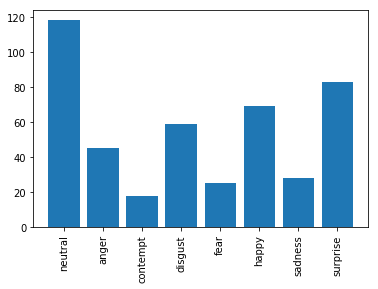

In [3]:
# Visualize the distribution of the dataset
import matplotlib.pyplot as plt                        
%matplotlib inline

image_dict = dict()
for emotion in emotions:
    image_dict[emotion] = len(glob.glob("dataset/{0}/*".format(emotion)))

plt.bar(range(len(image_dict)), list(image_dict.values()), align='center')
plt.xticks(range(len(image_dict)), list(image_dict.keys()), rotation=90)
plt.show()

We can observe that there is an unequal distribution of dataset among emotions. But does it matter for our algorithms? Lets find out.

#### Feature Extraction - Baseline

[Images Courtesy - Cohn-Kanade+ paper](http://www.pitt.edu/~jeffcohn/CVPR2010_CK+2.pdf)
![ActionUnit](https://drive.google.com/uc?export=view&id=1xMnDLiOz5_MxnDCMzJ5mKjM2yMXNNzCR)

The following method has 2 different phases.

1. Finding the face - Libraries like dlib has handy functions like `get_frontal_face_detector` which is handy to identify the face region
2. Extracting the features in the face - This is where most of the research in the past has gone into. It has been done so far by realizing through manual interference. One of the method is called Facial Action Coding System (FACS) which describes Facial expression using Action Units (AU). An Action Unit is a facial action like "raising the Inner eyebrow". Multiple Activation units when combined expresses the emotion in the underlying face. An example is provided below.

![FACS](https://drive.google.com/uc?export=view&id=14krm8krZudg4ekBOva4XYKcnAPoOM15j)

I use dlib's `shape_predictor` and its learned landmark predictor `shape_predictor_68_face_landmarks.bat` to extract AUs. Then as suggested in the model pipeline I implement SVM to compare distances between the extracted facial landmarks for different emotions.

##### Visualizing Action Units

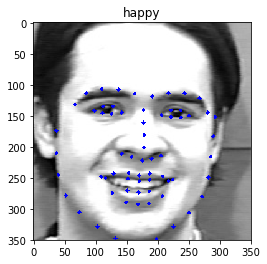

In [4]:
#Import required modules
import cv2
import dlib
#Set up some required objects
detector = dlib.get_frontal_face_detector() #Face detector
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") #Landmark identifier. Set the filename to whatever you named the downloaded file
frame = cv2.imread("dataset/happy/1.png")
detections = detector(frame, 1) #Detect the faces in the image
for k,d in enumerate(detections):#For each detected face
    shape = predictor(frame, d) #Get coordinates
    for i in range(1,68):#There are 68 landmark points on each face
        cv2.circle(frame, (shape.part(i).x, shape.part(i).y), 1, (0,0,255), thickness=3) #For each point, draw a red circle with thickness2 on the original frame
plt.imshow(frame)#Display the frame
plt.title("happy")
plt.show()

##### Example of shape predictor coordinates without the image

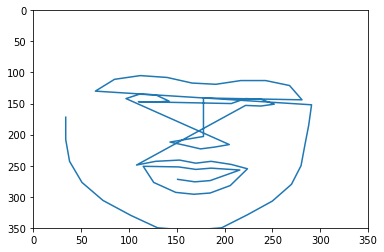

In [5]:
import numpy as np
sample_x = list()
sample_y = list()
detections = detector(frame, 1) #Detect the faces in the image
for k,d in enumerate(detections):#For each detected face
    shape = predictor(frame, d) #Get coordinates
    for i in range(1,68):
        sample_x.append(float(shape.part(i).x))
        sample_y.append(float(shape.part(i).y))
        
plt.plot(sample_x, sample_y)
plt.xlim((0,350))
plt.ylim((0,350))
plt.gca().invert_yaxis()
plt.show()

In [6]:
print(len(sample_x), len(sample_y))

67 67


The `shape_predictor_68_face_landmarks` above ave extracted 67 points in any face in both X and Y axis from the image presented. This X and Y points when combined becomes a Facial Landmark. They describe the position of all the “moving parts” of the depicted face, the things you use to express an emotion. The good thing about extracting facial landmark is that I will be extracting very important information from the image to use it and classify an emotion. But,

There are some problems when we directly capture these facial landmarks.

- They may change as face moves to different parts of the frame. An image could be expressing the same emotion in the top left pixel as in the bottom right pixel of another image, but the resulting coordinate matrix would express different numerical ranges and hence the two images can be classfied to different emotion instead of the same emotion.Therefore we need a location invariant coordinate matrix to help us classify an emotion.

The solution to this problem is derived in the following way.

1. Find the center of the shap predictor vector
2. Calculate the distance between all the shape predictor points to their center
3. Calculate the angle at which these points find themselves relative to the center point. 


What we now have is the relationship between all the points with the center point and how they are relatively positioned in the 2D space.Each tuple will have the following values `<x, y, distance_from_center, angle_relative_to_center>`. This additional information to each coordinate makes it location invariant. i.e There is a way to derive these points in the 2D system.

In [7]:
import math
def get_landmarks(image):
    data={}
    detections = detector(image, 1)
    for k,d in enumerate(detections): #For all detected face instances individually
        shape = predictor(image, d) #Draw Facial Landmarks with the predictor class
        xlist = []
        ylist = []
        for i in range(1,68): #Store X and Y coordinates in two lists
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
        # calculate the center of gravity
        xmean = np.mean(xlist)
        ymean = np.mean(ylist)
        # calculate the distance from center from both axis.
        # this information is used to get the angle relative to center point.
        xcentral = [(x-xmean) for x in xlist]
        ycentral = [(y-ymean) for y in ylist]
        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            # append x and y values
            landmarks_vectorised.append(w)
            landmarks_vectorised.append(z)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            # calculate the euclidiean distance from center
            dist = np.linalg.norm(coornp-meannp)
            # append the distance to the feature vector
            landmarks_vectorised.append(dist)
            # apend the angle relative to the center of gravity.
            landmarks_vectorised.append(math.degrees(math.atan2(y,x)))
        data['landmarks_vectorised'] = landmarks_vectorised
    if len(detections) < 1:
        data['landmarks_vestorised'] = "error"
    return data

In [8]:
print(get_landmarks(frame)["landmarks_vectorised"][0:4])

[34.0, 172.0, 143.73715832690573, -163.42042572345252]


#### Train-test split - baseline

Two helper functions below does the following work
1. `get_files` to randomly split the data in each emotion folder to training and test files. I have used 80/20 split.
2. `make_sets` runs across each emotion folder and gets the training and test files from `get_files` function. It then converts each image to feature using `get_landmarks` function and tags the file to the emotion label. Thus we have our training_data, training_labels, test_data, test_labels

In [9]:
def get_files(emotion):
    files = glob.glob("dataset/{0}/*".format(emotion))
    random.shuffle(files)
    train = files[:int(len(files)*0.8)] #get first 80% of file list
    test = files[-int(len(files)*0.2):] #get last 20% of file list
    return train, test

In [12]:
def make_sets():
    training_data = []
    training_labels = []
    test_data = []
    test_labels = []
    train_files_list = [] # its a list of dict of trainfiles
    test_files_list = [] 
    for emotion in emotions:
        #print(" working on %s" %emotion)
        train, test = get_files(emotion)
        #Append data to training and prediction list, and generate labels 0-7
        for item in train:
            d = dict()
            d["name"]= item
            d["emotion"] = emotions.index(emotion)
            train_files_list.append(d)
            image = cv2.imread(item) #open image
            data = get_landmarks(image)
            if data['landmarks_vectorised'] == "error":
                print("no face detected on this one")
            else:
                training_data.append(data['landmarks_vectorised']) #append image array to training data list
                training_labels.append(emotions.index(emotion))
        for item in test:
            d = dict()
            d["name"]= item
            d["emotion"] = emotions.index(emotion)
            test_files_list.append(d)
            image = cv2.imread(item)
            data = get_landmarks(image)
            if data['landmarks_vectorised'] == "error":
                print("no face detected on this one")
            else:
                test_data.append(data['landmarks_vectorised'])
                test_labels.append(emotions.index(emotion))
    return training_data, training_labels, test_data, test_labels, train_files_list, test_files_list

#### Model Application - Baseline

  I have chosen Support vector machines (SVMs) to map the different facial features to their emotions. SVMs attempt to find the hyperplane that maximizes the margin between positive and negative observations for a specified emotion class. Therefore its also called Maximum margin classifier.
  
  We use libSVM which uses one vs one classifier. i.e It will create $ (K * (K-1))/2 $ binary classifiers in total - where K here is number of classes 8. A total of 28 binary classfiers are created. 
  

##### Applying Linear SVM
> Definitions taken from [Cohn-Kanade+ paper](http://www.pitt.edu/~jeffcohn/CVPR2010_CK+2.pdf)

A linear SVM classification decision is made for an unlabeled test observation `x*` by,

$w^Tx^* >^{true}  b$  
$w^Tx^* <=^{false} b$  

where w is the vector normal to the separating hyperplane and b is the bias. Both w and b are estimated so that they minimize the risk of a train-set, thus avoiding the possibility of overfitting to the training data. Typically, w is not defined explicitly, but through a linear sum of support vectors.

Lets understand the accuracy of the model in identifying the emotion based on the features we developed. We have asked the model to provide probability scores of the model on different categories.

In [13]:
from sklearn.svm import SVC
clf_lin_svm = SVC(kernel='linear', random_state=7, probability=True, tol=1e-3)
trails = []
for i in range(0,10):
    print("Making sets for trail #%s" %i) #Make sets by random sampling 80/20%
    train_data, train_labels, test_data, test_labels, train_files_list, test_files_list = make_sets()
    X_train = np.array(train_data) #Turn the training set into a numpy array for the classifier
    y_train = np.array(train_labels)
    print("training SVM linear for trail #%s" %i) #train SVM
    clf_lin_svm.fit(X_train, y_train)
    print("getting accuracies for trail #%s" %i) #Use score() function to get accuracy
    X_test = np.array(test_data)
    y_test = np.array(test_labels)
    accuracy = clf_lin_svm.score(X_test, y_test)
    print("Accuracy Score for trail #{0} = {1} ".format(i,accuracy))
    trails.append(accuracy) #Store accuracy in a list
print("Mean accuracy score: %s" %np.mean(trails)) #Get mean accuracy of the 10 runs

Making sets for trail #0
training SVM linear for trail #0
getting accuracies for trail #0
Accuracy Score for trail #0 = 0.8588235294117647 
Making sets for trail #1
training SVM linear for trail #1
getting accuracies for trail #1
Accuracy Score for trail #1 = 0.8117647058823529 
Making sets for trail #2
training SVM linear for trail #2
getting accuracies for trail #2
Accuracy Score for trail #2 = 0.8117647058823529 
Making sets for trail #3
training SVM linear for trail #3
getting accuracies for trail #3
Accuracy Score for trail #3 = 0.788235294117647 
Making sets for trail #4
training SVM linear for trail #4
getting accuracies for trail #4
Accuracy Score for trail #4 = 0.7176470588235294 
Making sets for trail #5
training SVM linear for trail #5
getting accuracies for trail #5
Accuracy Score for trail #5 = 0.8352941176470589 
Making sets for trail #6
training SVM linear for trail #6
getting accuracies for trail #6
Accuracy Score for trail #6 = 0.8470588235294118 
Making sets for trail

Amazing, We got a mean accuracy of `81%` in our 10 trails. Lets examine if the rest of the `19%` can be classified if the features are transformed to a higher dimension.

#### Comparing with SVM Linear and SVM Polynomial Kernal

   The kernel methods in SVM are used when we don't have lineraly seperable data. Kernel methods transform the data to higher dimension to make them seperable. Let's identify if that is the case with our dataset.

In [14]:
# TODO: Initialize the three models

clf_poly_svm = SVC(kernel="poly", random_state=11, probability=True, tol=1e-3)

trails = []
for i in range(0,10):
    print("Making sets for trail #%s" %i) #Make sets by random sampling 80/20%
    train_data, train_labels, test_data, test_labels, train_files_list, test_files_list = make_sets()
    X_train = np.array(train_data) #Turn the training set into a numpy array for the classifier
    y_train = np.array(train_labels)
    print("training SVM Poly for trail #%s" %i) #train SVM
    clf_poly_svm.fit(X_train, y_train)
    print("getting accuracies for trail #%s" %i) #Use score() function to get accuracy
    X_test = np.array(test_data)
    y_test = np.array(test_labels)
    accuracy = clf_poly_svm.score(X_test, y_test)
    print("Accuracy Score for trail #{0} = {1} ".format(i,accuracy))
    trails.append(accuracy) #Store accuracy in a list
print("Mean accuracy score: %s" %np.mean(trails)) #Get mean accuracy of the 10 runs

Making sets for trail #0
training SVM Poly for trail #0
getting accuracies for trail #0
Accuracy Score for trail #0 = 0.8 
Making sets for trail #1
training SVM Poly for trail #1
getting accuracies for trail #1
Accuracy Score for trail #1 = 0.788235294117647 
Making sets for trail #2
training SVM Poly for trail #2
getting accuracies for trail #2
Accuracy Score for trail #2 = 0.7647058823529411 
Making sets for trail #3
training SVM Poly for trail #3
getting accuracies for trail #3
Accuracy Score for trail #3 = 0.788235294117647 
Making sets for trail #4
training SVM Poly for trail #4
getting accuracies for trail #4
Accuracy Score for trail #4 = 0.8823529411764706 
Making sets for trail #5
training SVM Poly for trail #5
getting accuracies for trail #5
Accuracy Score for trail #5 = 0.8117647058823529 
Making sets for trail #6
training SVM Poly for trail #6
getting accuracies for trail #6
Accuracy Score for trail #6 = 0.8352941176470589 
Making sets for trail #7
training SVM Poly for trai

Surprisingly there doesn't seem to be a great difference in the performance of the Polynomial SVM when compared to linear SVM. May be our extracted and enriched feature set caused additional variance and overfitted the training data. We will for now go with the Linear SVM as our baseline and check the confusion matrix.

In [45]:
# taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [46]:
test_pred = clf_lin_svm.predict(test_data)

Normalized confusion matrix


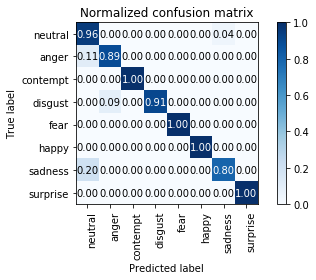

In [47]:
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plot_confusion_matrix(test_labels, test_pred, classes=emotions, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [48]:
import pandas as pd
train_df = pd.DataFrame(train_files_list)
test_df = pd.DataFrame(test_files_list)

In [66]:
np.unique(test_df["emotion"])

array([0, 1, 2, 3, 4, 5, 6, 7])

In [65]:
test_df.groupby("emotion").size()

emotion
0    23
1     9
2     3
3    11
4     5
5    13
6     5
7    16
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e4a87b8>]],
      dtype=object)

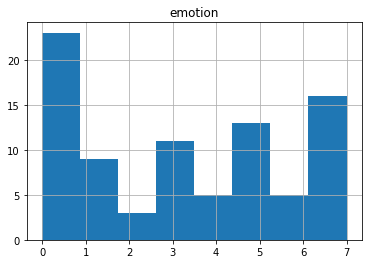

In [67]:
# visualize the distribution of emotions in test set
test_df.hist(column="emotion", bins = len(np.unique(test_df["emotion"])))

We have very limited test samples in Contempt, Fear and Sadness emotion. Lets visualize the emotions that went wrong.

In [64]:
test_df["prediction"] = test_pred
# distil all the misclassified images.
miscalssified_df = test_df[test_df["emotion"]!=test_df["prediction"]]
display(miscalssified_df)

,emotion,name,prediction
10,0,dataset/neutral/38.png,6
30,1,dataset/anger/10.png,0
43,3,dataset/disgust/31.png,1
64,6,dataset/sadness/5.png,0


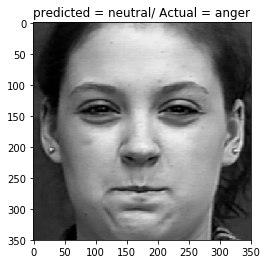

array([0.83, 0.04, 0.05, 0.05, 0.  , 0.  , 0.02, 0.02])

In [83]:
# Showing the misclassified image and its predicted probability

image = cv2.imread("dataset/anger/10.png")
plt.title("predicted = {0}/ Actual = {1}".format(emotions[clf_lin_svm.predict(test_data)[30]], emotions[test_labels[30]]))
plt.imshow(image)
plt.show()
clf_lin_svm.predict_proba(test_data)[30]

I am confident about my methodology. But I am not very confident if I have collected enough data. I am going to go with the same dataset and explore how my model performs with some wild images later after I define my deep neural nets.